In [22]:
from mlswarm.mlswarm import function
import numpy as np

gammas = [[1,0,0.1]]
func_list = []

np.random.seed(42)
for i in range(len(gammas)):
    func = function(lambda x: np.sin(10*np.pi*x[0])/(2*x[0]) + (x[0]-1)**4, "Gramacy & Lee Function")
    np.random.seed(42)
    func.init_cloud(np.array([np.linspace(1,2,100)]))
    func.minimize(max_iterations = 10000, var_epsilon = 0.00001, 
                  learning_rate = 0.01,
                  method = "swarm_derivfree",
                  kernel_a = 0.1, alpha_init = 0, alpha_rate = 1, beta=0, gamma=1,
                  verbose = False, track_history = True)
    func_list.append(func)

Convergence achieved - Particles are localized

Function value at cloud mean: -0.5079930823129156
Function value evaluated 93000 times

The clock time (CPU time) for train_fmin was 1.26810 (1.25000) seconds


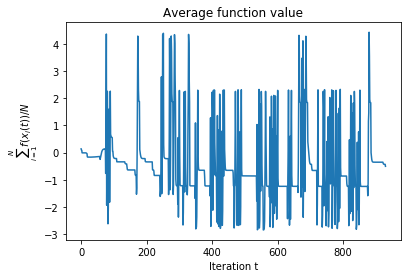

In [23]:
func_list[0].plot_cost_mean_history()

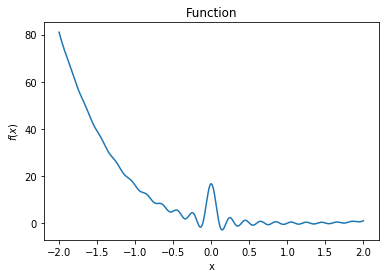

In [3]:
func_list[0].plot_function(limits=[-2,2])

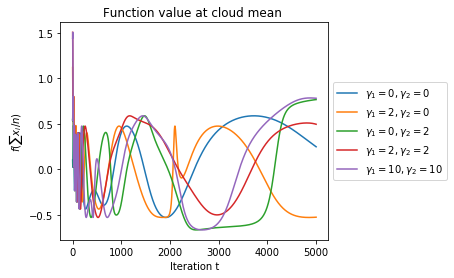

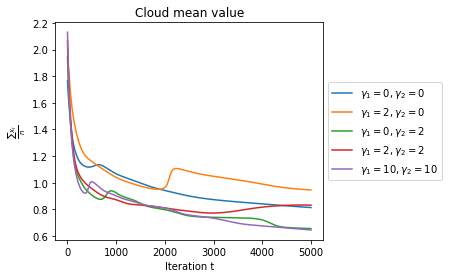

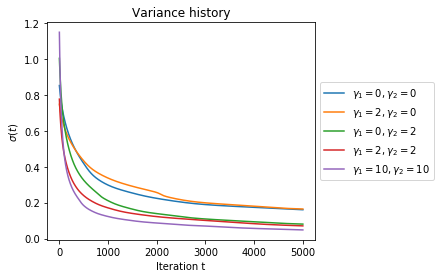

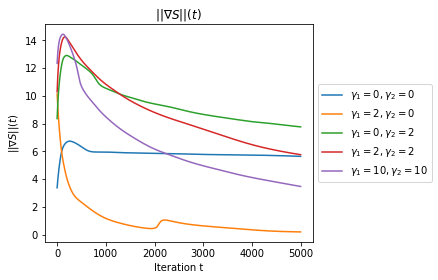

In [6]:
from mlswarm.mlswarm import plot_data
history_cost_mean = np.array([func.cost_history_mean for func in func_list]) #cloud mean value for each configuration
history_cloud_mean = np.array([func.cloud_history_mean for func in func_list])
cloud_var_history = np.array([func.cloud_var_history for func in func_list])
gradS_history = np.array([func.gradS_history for func in func_list])
max_iterations = func_list[0].train_parameters[0]
x = np.arange(max_iterations)

legend = [r'$\gamma_1 = 0, \gamma_2 = 0$',r'$\gamma_1 = 2, \gamma_2 = 0$',r'$\gamma_1 = 0, \gamma_2 = 2$',r'$\gamma_1 = 2, \gamma_2 = 2$',r'$\gamma_1 = 10, \gamma_2 = 10$']
plot_data(x, history_cost_mean, 'Function value at cloud mean ', 'Iteration t', r'$f(\sum x_i/n )$', legend)
plot_data(x, history_cloud_mean, 'Cloud mean value', 'Iteration t', r'$\frac{\sum x_i}{n}$', legend)
plot_data(x, cloud_var_history, 'Variance history', 'Iteration t', r'$\sigma (t)$', legend)
plot_data(x, gradS_history, r'$||\nabla S|| (t)$', 'Iteration t', r'$||\nabla S|| (t)$', legend)

In [9]:
np.array([func.cloud_mean for func in func_list]) #cloud mean value for each configuration

array([[0.54855021]])